<a href="https://colab.research.google.com/github/jamalamro25/CMP7005_PRAC1_Jamalamro/blob/main/Final_Assignment_CMP7005_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Background and Objective

The Indian Cities Air Quality Dataset, compiled from multiple city files, contains daily measurements of key atmospheric pollutants such as PM2.5, PM10, NO₂, NOx, SO₂, CO, O₃, NH₃, Benzene, Toluene, and Xylene. Along with pollutant levels, the dataset also includes date and city information, enabling a detailed analysis of air pollution patterns across different regions of India.

The primary objective of this project is to clean, integrate, and analyse this multi-city dataset to understand pollution trends, compare air quality between cities, and identify the factors contributing to high AQI (Air Quality Index) readings. Python-based data processing, exploratory data analysis (EDA) are used, and predictive modelling to uncover insights that support environmental planning and policy decisions.

## Main Reason for Conducting the Project

The main purpose of this project is to apply professional data analysis and visualization techniques to a real-world environmental dataset. By transforming raw air-quality readings into meaningful insights, the project demonstrates practical skills in:


*  Data cleaning & preprocessing

*  Exploratory data analysis (EDA)

*  Machine learning modelling

*  Streamlit dashboard (Application Development)

More importantly, the work provides a deeper understanding of pollution patterns across Indian cities, helping highlight areas with critical air-quality challenges and trends that require attention.



## **Part 1 - Data Hanlding**

# Import data

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
%cd '/content/drive/MyDrive/Programming for Data Analysis/Assigment/Assessment Data-20251028'

/content/drive/MyDrive/Programming for Data Analysis/Assigment/Assessment Data-20251028


In [78]:
%ls

Ahmedabad_data.csv     Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv        Coimbatore_data.csv  Kolkata_data.csv
Amaravati_data.csv     Delhi_data.csv       Lucknow_data.csv
Amritsar_data.csv      Ernakulam_data.csv   Mumbai_data.csv
AQI_Trend_Plot.png     Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv     Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv        Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv  Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv    Jorapokhar_data.csv  Visakhapatnam_data.csv


# Import Python libraries

In [79]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the csv files into one dataset
To build a complete air-quality dataset, all individual daily CSV files stored in my project directory were automatically combined into a single master dataset. This was achieved by scanning the selected Drive folder for every file with a .csv extension, loading each one into a separate Pandas DataFrame, and storing them temporarily in a list. After all files were processed, these DataFrames were merged together using pd.concat(), which stacks them vertically into one unified table. The index was reset to maintain a clean, continuous order.

This approach ensures that air-quality data from multiple months and cities is consolidated into a single, consistent dataset, allowing for easier cleaning, analysis, EDA, and machine-learning work.

In [80]:
drive_path = '/content/drive/MyDrive/Programming for Data Analysis/Assigment/Assessment Data-20251028'

In [81]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(drive_path, filename)
        df_temp = pd.read_csv(os.path.join(drive_path, filename))
        dataframes.append(df_temp)


In [82]:
df = pd.concat(dataframes, ignore_index=True)

In [83]:
print("Merged data shape:", df.shape)

Merged data shape: (29531, 16)


# Data Understanding to gain general insight:

In [84]:
df.shape

(29531, 16)

In [85]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [86]:
df.head()

City        Date   PM2.5    PM10  NO    NO2  NOx   NH3    CO   SO2  \
0  Brajrajnagar  07/12/2017  171.38  311.68 NaN  41.07  NaN  7.78  3.26  5.83   
1  Brajrajnagar  08/12/2017  126.67  192.81 NaN  20.16  NaN  7.97  2.94  5.43   
2  Brajrajnagar  09/12/2017  105.11  154.39 NaN  18.40  NaN  8.15  2.83  5.10   
3  Brajrajnagar  10/12/2017   65.25   99.73 NaN  15.21  NaN  7.90  2.74  4.75   
4  Brajrajnagar  11/12/2017     NaN     NaN NaN    NaN  NaN   NaN   NaN   NaN   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0   4.69      0.0      NaN     NaN    NaN        NaN  
1  10.51      0.0      NaN     NaN  304.0  Very Poor  
2  10.33      0.0      NaN     NaN  291.0       Poor  
3   8.37      0.0      NaN     NaN  189.0   Moderate  
4    NaN      NaN      NaN     NaN    NaN        NaN

In [87]:
df.tail()

City        Date  PM2.5   PM10     NO    NO2    NOx   NH3    CO   SO2  \
29526  Patna  27/06/2020  17.71  63.73   9.47  23.01  22.28  1.91  0.87  3.63   
29527  Patna  28/06/2020  19.27  57.42  30.19  18.13  36.76  2.05  0.72  3.92   
29528  Patna  29/06/2020  17.24  42.83  42.40  20.51  47.69  2.26  0.88  3.60   
29529  Patna  30/06/2020  29.76  60.68  42.12  27.50  52.04  1.59  0.83  3.91   
29530  Patna  01/07/2020  35.42  57.82  44.50  31.15  57.72  1.14  0.82  3.99   

          O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  23.39     1.09     3.07    0.97  65.0  Satisfactory  
29527  17.37     1.18     2.90    1.24  82.0  Satisfactory  
29528  17.50     1.51     4.91    1.74  88.0  Satisfactory  
29529  21.70     1.58     8.59    2.02  93.0  Satisfactory  
29530  25.76     1.73     5.50    2.14  98.0  Satisfactory

In [88]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [89]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [91]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [92]:
df.duplicated().sum()

np.int64(0)

# Infrences

it should be updated

# Performing Data Preprocessing

In [93]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
print(" Extra spaces removed from the all columns")

 Extra spaces removed from the all columns


In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
def missing_value_table(df):
        mis_val = df.isnull().sum()
        mis_val_per = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False)
        return mis_val_table
missing_values = missing_value_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))



In [96]:
df['Date']= pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
print("Invalid dates :", df['Date'].isnull().sum())

df = df.sort_values(by=['City', 'Date']).reset_index(drop=True)
print(df['Date'].head(10))
print(df.dtypes['Date'])

Invalid dates : 0
0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
5   2015-01-06
6   2015-01-07
7   2015-01-08
8   2015-01-09
9   2015-01-10
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [97]:
df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month

In [98]:
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
Year              0
Month             0
dtype: int64

make sure no cities appear with mixed cases or hidden characters

In [99]:
df['City'].value_counts().head(20)

City
Ahmedabad             2009
Bengaluru             2009
Chennai               2009
Mumbai                2009
Lucknow               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Name: count, dtype: int64

Remove Spaces

In [100]:
df['City'] = df['City'].astype(str).str.title()

In [101]:
df['City'] = df['City'].astype('category')
df.dtypes

City                category
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
Year                   int32
Month                  int32
dtype: object

In [102]:
df.isnull().sum().sort_values(ascending=False)



Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
Year              0
Month             0
dtype: int64

In [103]:
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
Year              0
Month             0
dtype: int64

# Handling missing values

In [104]:
df.isnull().sum().sort_values(ascending=False)


Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
Year              0
Month             0
dtype: int64

In [105]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



# Replace obvious text-based missing placeholders
df.replace(["", " ", "-", "--", "NA", "N/A", "na", "null", "None"], np.nan, inplace=True)

# Convert potentially numeric columns to numeric (force errors to NaN)
for col in df.columns:
    # We explicitly exclude 'City' and 'AQI_Bucket' which are meant to be categorical
    if df[col].dtype == 'object' and col not in ['City', 'AQI_Bucket', 'Date']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Step 1: Initial cleanup and type conversion complete.")
print("-" * 50)


# Define columns that have special handling rules
special_numeric_cols = {"Xylene", "AQI", "PM10", "Toluene", "Benzene", "NH3"}

# --- Rule 1: PM10, Toluene, Benzene → fill with median ---
for col in ["PM10", "Toluene", "Benzene"]:
    if col in df.columns and df[col].isna().any():
        med_val = df[col].median(skipna=True)
        df[col].fillna(med_val, inplace=True)
        print(f"✅ {col} filled with median ({round(med_val, 2)}).")

# --- Rule 2: NH3 → fill using per-city regression (fallback to median) ---
if "NH3" in df.columns and "City" in df.columns and df["NH3"].isna().any():
    before = df["NH3"].isna().sum()
    # Use all other relevant numeric columns as predictors, excluding the target and skipped ones
    predictors = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ["NH3", "Xylene", "AQI"]]

    # 2a. Regression Imputation
    for city, grp in df.groupby("City"):
        train = grp.dropna(subset=["NH3"] + predictors)
        test = grp[grp["NH3"].isna() & grp[predictors].notna().all(axis=1)]
        if len(train) >= 10 and len(test) > 0:
            model = LinearRegression()
            model.fit(train[predictors], train["NH3"])
            df.loc[test.index, "NH3"] = model.predict(test[predictors])

    # 2b. Fallback Imputation (City Median, then Global Median)
    df["NH3"] = df.groupby("City")["NH3"].transform(lambda x: x.fillna(x.median()))
    df["NH3"].fillna(df["NH3"].median(), inplace=True)
    after = df["NH3"].isna().sum()
    print(f"✅ NH3 regression filled {before - after} values.")

# --- Rule 3: All other *numeric* columns (e.g., SO2, CO, NOX) → fill with mean ---
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in special_numeric_cols and df[col].isna().any():
        mean_val = df[col].mean(skipna=True)
        df[col].fillna(mean_val, inplace=True)
        print(f"✅ {col} filled with mean ({round(mean_val, 2)}).")

# --- Rule 4: Handle previously skipped 'Xylene' and 'AQI' (using mean) ---
for col in ["Xylene", "AQI"]:
    if col in df.columns and df[col].isna().any():
        mean_val = df[col].mean(skipna=True)
        df[col].fillna(mean_val, inplace=True)
        print(f"✅ {col} filled with mean ({round(mean_val, 2)}).")

print("-" * 50)
print("Step 2: Numeric imputation complete.")
print("-" * 50)


# --- Rule 5: Impute Categorical/Date with the Mode (Most Frequent) ---
categorical_cols = ["City", "AQI_Bucket", "Date", "Year", "Month"]

for col in categorical_cols:
    if col in df.columns and df[col].isna().any():
        # Mode is the most appropriate for categorical data
        mode_val = df[col].mode()
        if not mode_val.empty:
            mode_val = mode_val[0] # Get the first mode if multiple exist
            df[col].fillna(mode_val, inplace=True)
            print(f"✅ {col} filled with mode ({mode_val}).")
        else:
            print(f"⚠️ {col} is entirely NaN, cannot fill with mode.")

# --- Rule 6: Round continuous numeric columns to 2 decimals only ---
round_cols = ["PM2.5", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]

for col in round_cols:
    if col in df.columns:
        df[col] = df[col].round(2)

# --- Convert AQI to integer only ---
if "AQI" in df.columns:
    df["AQI"] = df["AQI"].round(0).astype(int)


print("\n🎯 Missing value imputation completed successfully.")
# Display the final summary to confirm all values are zero
print("\nFinal missing value check:")
print(df.isnull().sum().sort_values(ascending=False).head(10))





Step 1: Initial cleanup and type conversion complete.
--------------------------------------------------
✅ PM10 filled with median (95.68).
✅ Toluene filled with median (2.97).
✅ Benzene filled with median (1.07).


/tmp/ipython-input-482120341.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(med_val, inplace=True)
/tmp/ipython-input-482120341.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for city, grp in df.groupby("City"):
/tmp/ipython-input-482120341.py:51: FutureWarning: The default of observed=False is deprecated and wi

✅ NH3 regression filled 10328 values.
✅ PM2.5 filled with mean (67.45).
✅ NO filled with mean (17.57).
✅ NO2 filled with mean (28.56).
✅ NOx filled with mean (32.31).
✅ CO filled with mean (2.25).
✅ SO2 filled with mean (14.53).
✅ O3 filled with mean (34.49).
✅ Xylene filled with mean (3.07).
✅ AQI filled with mean (166.46).
--------------------------------------------------
Step 2: Numeric imputation complete.
--------------------------------------------------
✅ AQI_Bucket filled with mode (Moderate).

🎯 Missing value imputation completed successfully.

Final missing value check:
City     0
Date     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
dtype: int64


/tmp/ipython-input-482120341.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NH3"].fillna(df["NH3"].median(), inplace=True)
/tmp/ipython-input-482120341.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [106]:
df.isnull().sum().sort_values(ascending=False)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
dtype: int64

#Inferences:

I used mean, median, and regression-based imputation because these methods preserve the statistical behaviour of each pollutant and generate realistic estimates for missing values. The dataset contains several irregularities such as inconsistent measurements, repeated values, and pollutants with skewed distributions. Median imputation is appropriate for variables affected by outliers, mean imputation works well for smoother features, and regression allows missing values to be inferred using relationships between pollutants.

Forward-fill was not used because the data is not a continuous or regular time-series. Many measurements do not follow hourly or daily sequencing, and some pollutants contain repeated placeholder values. Applying forward-fill would simply copy these incorrect or inconsistent values into additional rows, creating artificial patterns and distorting the true distribution of the data. The chosen imputation methods provide a more reliable and statistically sound way to handle missing values in this dataset.

In [107]:
df

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01  67.45  95.68   0.92  18.22  17.15  15.63   
1          Ahmedabad 2015-01-02  67.45  95.68   0.97  15.69  16.46  15.63   
2          Ahmedabad 2015-01-03  67.45  95.68  17.40  19.30  29.70  15.63   
3          Ahmedabad 2015-01-04  67.45  95.68   1.70  18.48  17.97  15.63   
4          Ahmedabad 2015-01-05  67.45  95.68  22.10  21.42  37.76  15.63   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene    Xylene  AQI    AQI_Bucket  \
0       0.92  27.64  133.36     0.00     0.02  0.000000  166      Moderate   
1       0.97  24.55   34.06     3.68     5.50  3.770000  166      Moderate   
2      17.40  29.07   30.70     6.80    16.40  2.250000  166      Moderate   
3       1.70  18.59   36.08     4.43    10.14  1.000000  166      Moderate   
4      22.10  39.33   39.31     7.01    18.89  2.780000  166      Moderate   
...      ...    ...     ...      ...      ...       ...  ...           ...   
29526   0.47   8.55   23.30     2.24    12.07  0.730000   41          Good   
29527   0.52  12.72   30.14     0.74     2.21  0.380000   70  Satisfactory   
29528   0.48   8.42   30.96     0.01     0.01  0.000000   68  Satisfactory   
29529   0.52   9.84   28.30     0.00     0.00  0.000000   54  Satisfactory   
29530   0.59   2.10   17.05     1.07     2.97  3.070128   50          Good   

       Year  Month  
0      2015      1  
1      2015      1  
2      2015      1  
3      2015      1  
4      2015      1  
...     ...    ...  
29526  2020      6  
29527  2020      6  
29528  2020      6  
29529  2020      6  
29530  2020      7  

[29531 rows x 18 columns]

# **Part 2: Exploratory Data Analysis (EDA):**

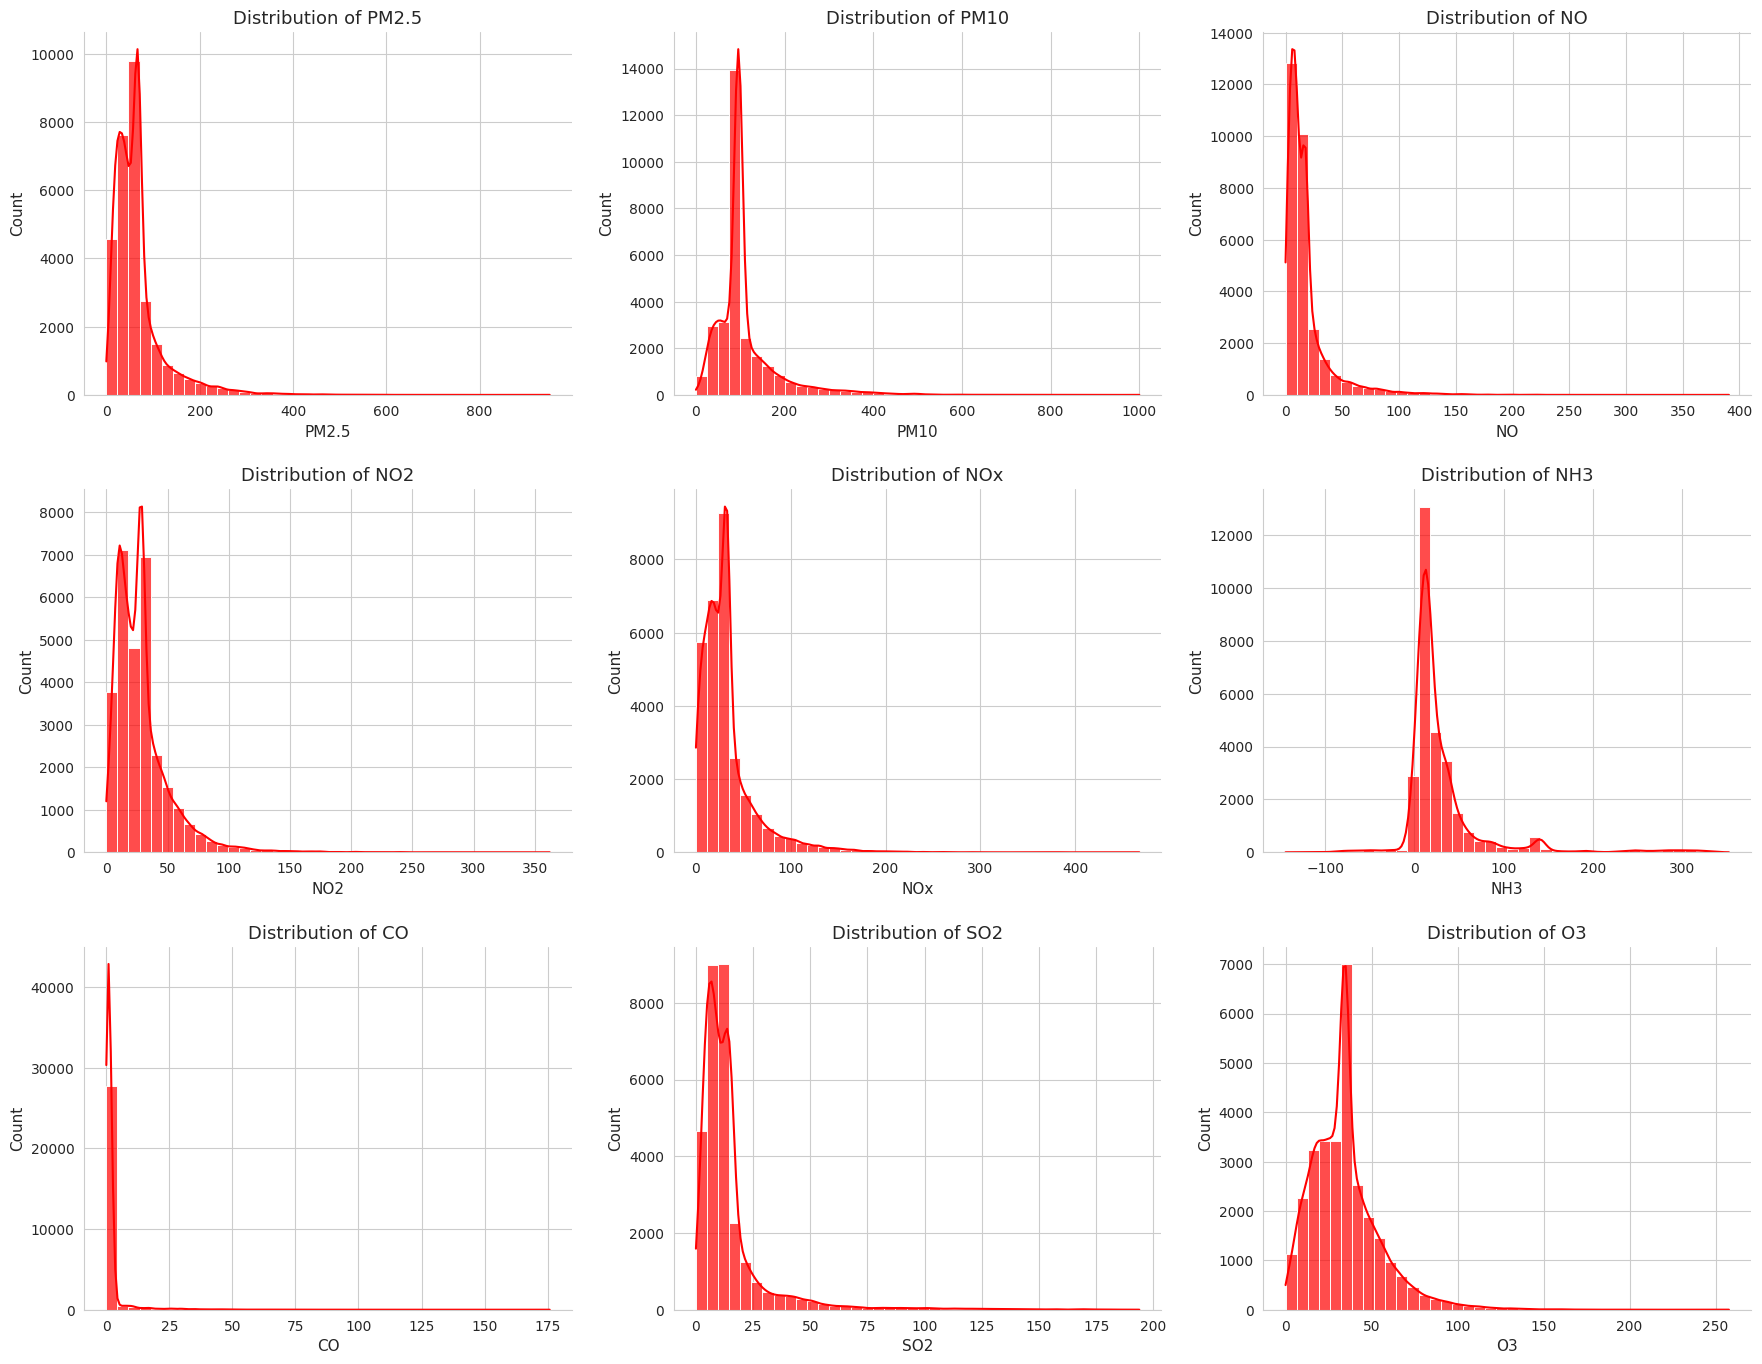

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

pollutants = ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3"]

plt.figure(figsize=(18,14))

for i, col in enumerate(pollutants, 1):
    plt.subplot(3,3,i)

    sns.histplot(
        df[col],
        bins=40,          # fewer bins → clearer
        kde=True,         # smooth KDE curve
        color="Red",
        alpha=0.7,        # transparency for clarity
        edgecolor=None
    )

    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)

    # Cleaning up visual noise
    sns.despine()

plt.tight_layout(pad=2)
plt.show()



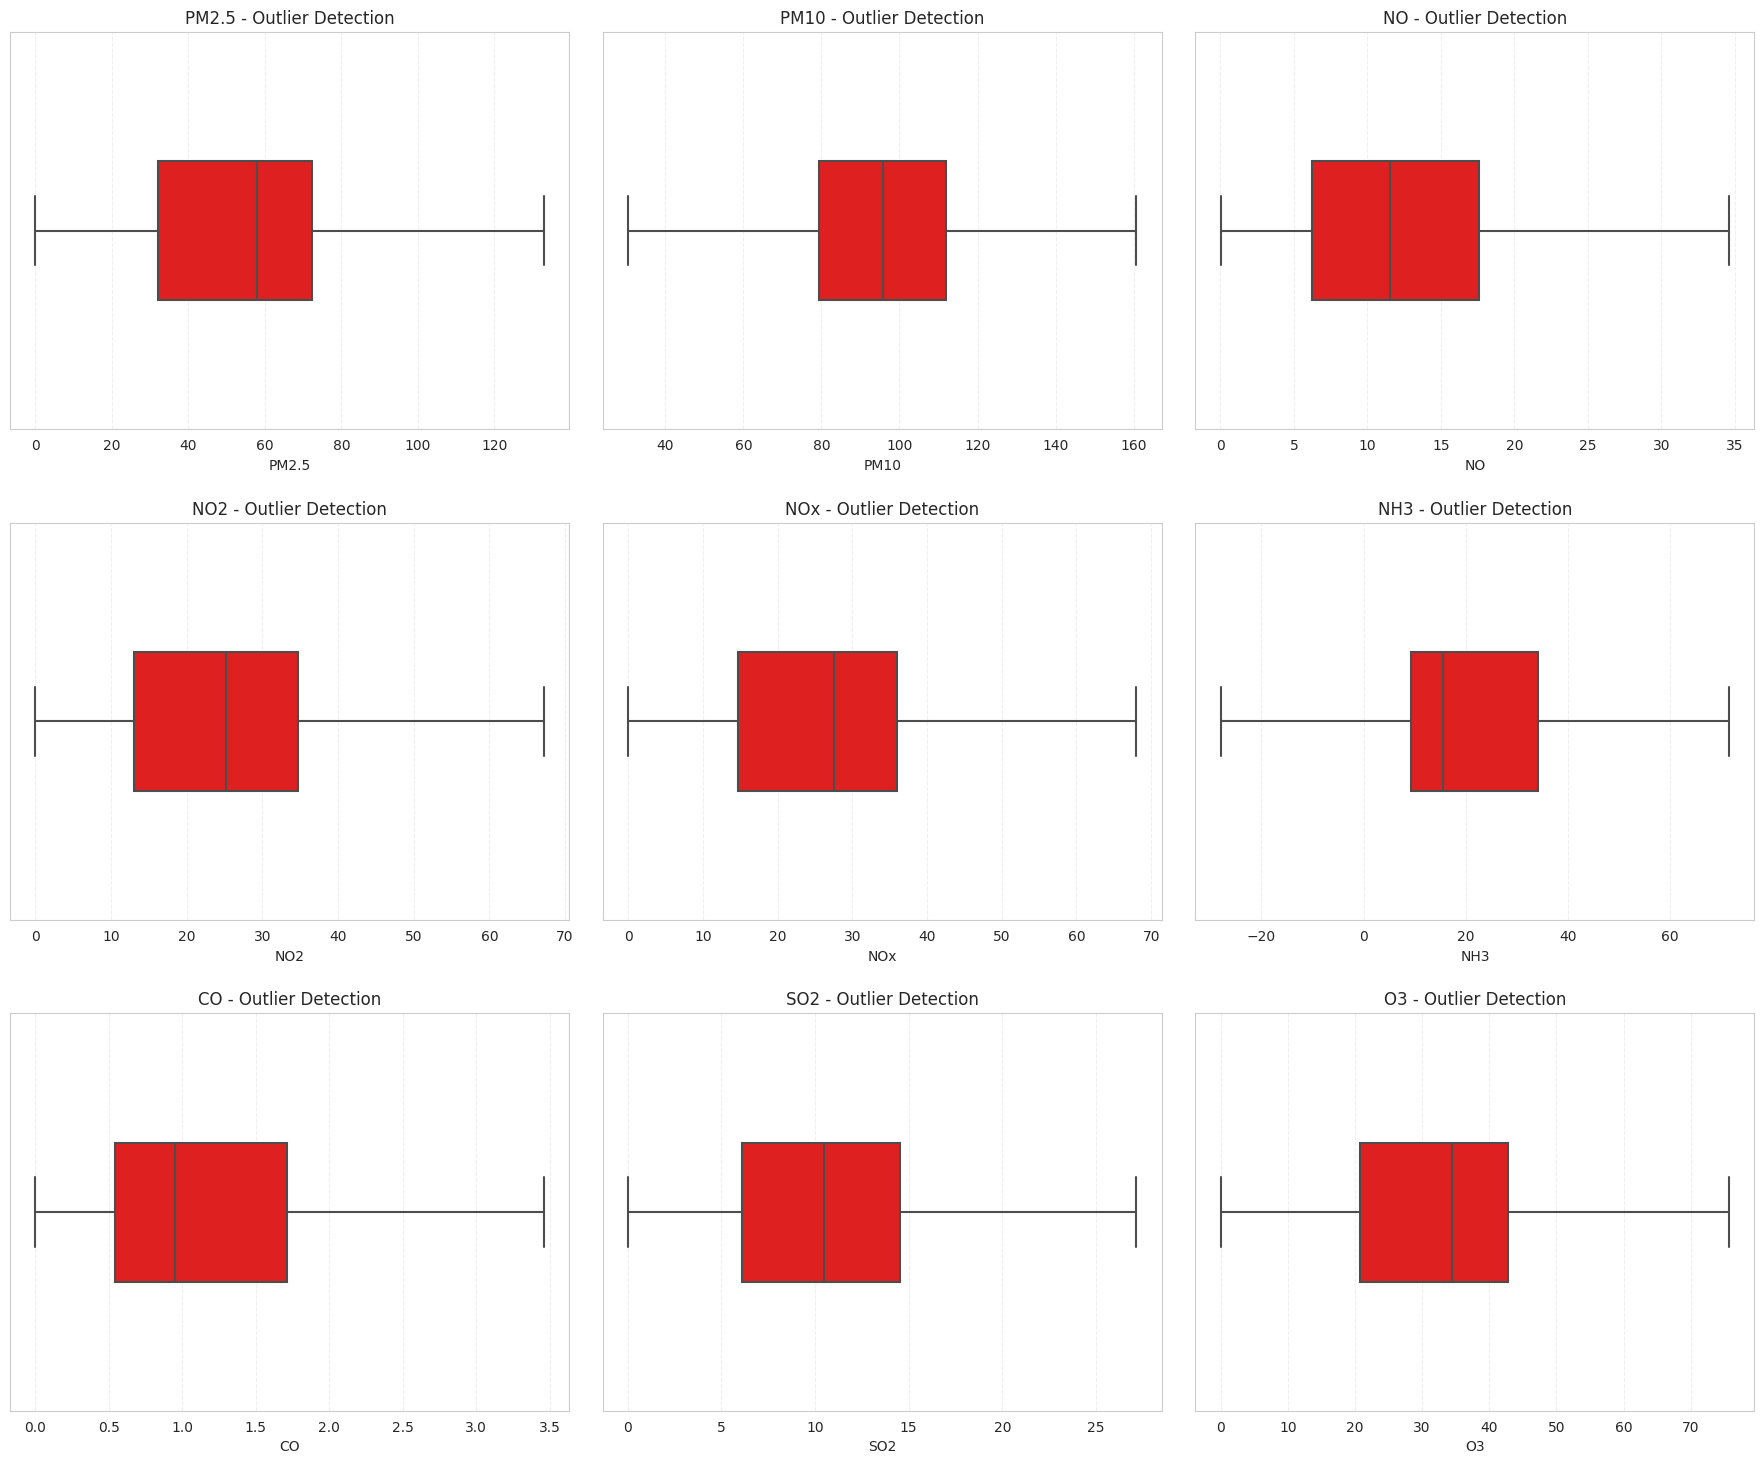

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))

for i, col in enumerate(pollutants, 1):
    plt.subplot(3,3,i)

    sns.boxplot(
        x=df[col],
        color="#FF0000",       # clean soft red
        showfliers=False,     # hide outliers for clarity
        linewidth=1.5,        # clearer box edges
        width=0.35            # wider box for readability
    )

    plt.title(f"{col} - Outlier Detection", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.3)  # soft grid to improve readability

plt.tight_layout(pad=2)
plt.show()




#Inferences:
Most pollutants show a strong right-skewed distribution, meaning low to moderate values occur frequently, while high pollution spikes occur less often.

PM2.5 has the widest range and the highest peaks, making it the pollutant with the strongest influence on air-quality levels.

PM10, NO₂, and NOx also show noticeable variability, but their impact is lower than PM2.5 in this dataset.

CO, SO₂, NH₃, and O₃ appear in narrow value ranges, indicating weaker contribution to AQI changes.

Several pollutants have repeated or nearly constant values, suggesting possible issues with measurement accuracy or placeholder values in the raw data.

Overall, PM2.5, NO₂, and NOx emerge as the key pollutants that most significantly affect air quality, while others show limited variation or lower impact.

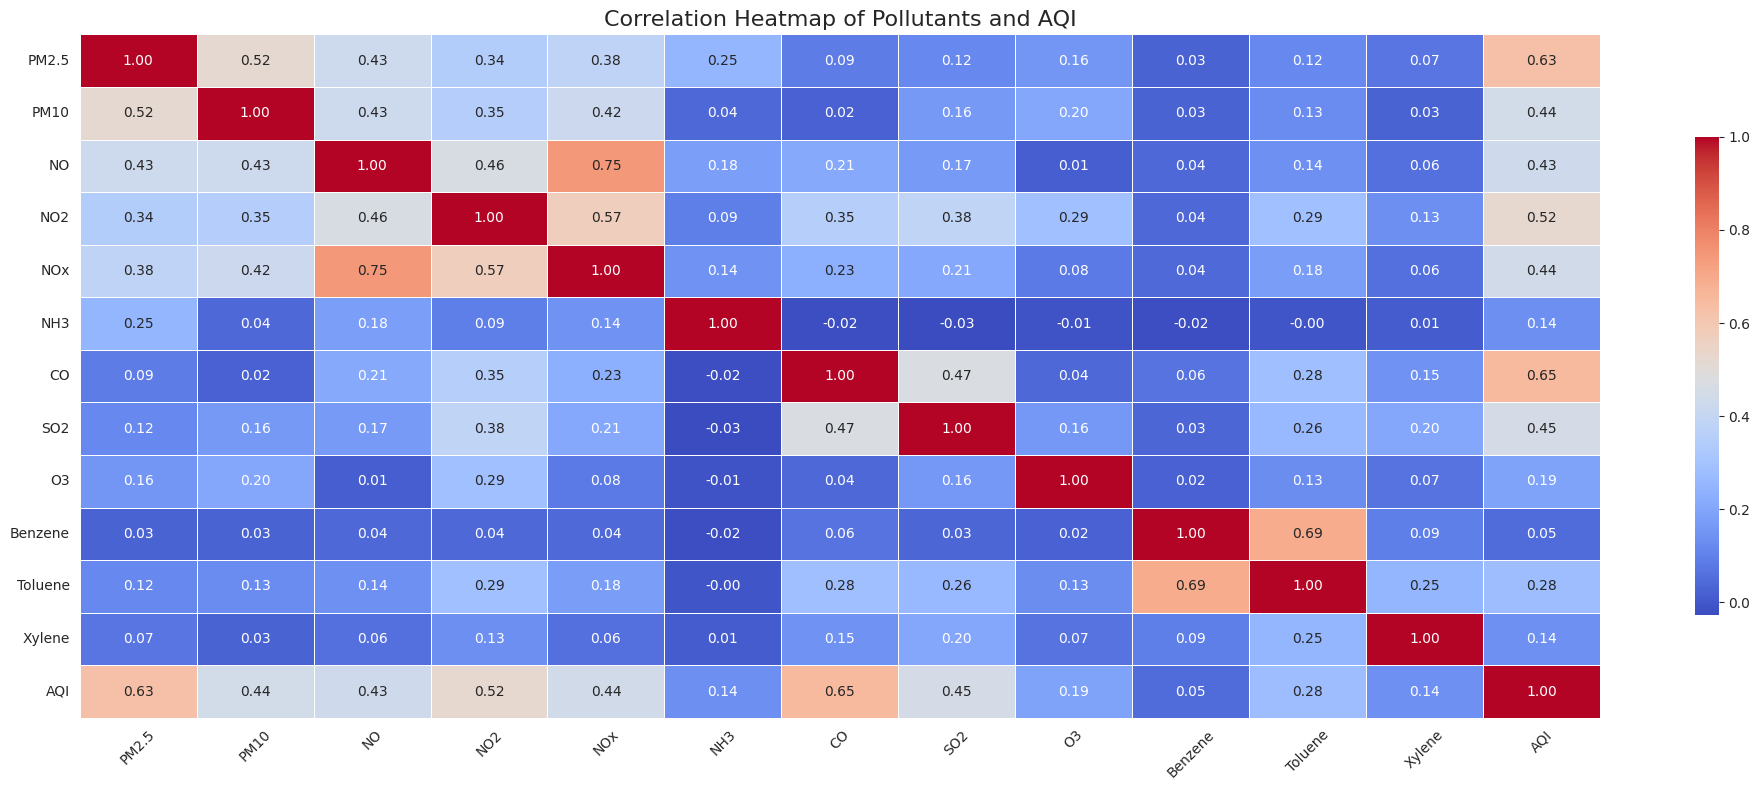

In [110]:
plt.figure(figsize=(20,8))  # wider shape for horizontal style

numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=False,            # <-- important to allow rectangular cells
    cbar_kws={"shrink": 0.7}
)

plt.xticks(rotation=45)
plt.title("Correlation Heatmap of Pollutants and AQI", fontsize=16)
plt.tight_layout()
plt.show()


In [111]:
# Calculate standard deviation of AQI for each city
city_std = df.groupby("City")["AQI"].std().sort_values(ascending=False)

# Show full ranking
print(city_std)

# Select the top 3 cities
top_3_cities = city_std.head(3).index.tolist()
print("Top 3 Cities with highest AQI variation:", top_3_cities)


City
Ahmedabad             287.719988
Delhi                 119.420776
Lucknow               114.179828
Gurugram              113.385164
Patna                 112.672476
Guwahati              112.005926
Kolkata               100.782453
Talcher                91.128318
Amritsar               74.934634
Jorapokhar             68.844620
Brajrajnagar           61.708731
Shillong               57.980010
Chandigarh             57.394182
Amaravati              57.365506
Bhopal                 55.287809
Jaipur                 53.990166
Hyderabad              53.260037
Visakhapatnam          52.837330
Chennai                51.839001
Bengaluru              41.898683
Mumbai                 41.692196
Kochi                  34.968226
Thiruvananthapuram     34.318456
Coimbatore             33.632562
Aizawl                 26.339662
Ernakulam              25.321548
Name: AQI, dtype: float64
Top 3 Cities with highest AQI variation: ['Ahmedabad', 'Delhi', 'Lucknow']


/tmp/ipython-input-3944226829.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_std = df.groupby("City")["AQI"].std().sort_values(ascending=False)


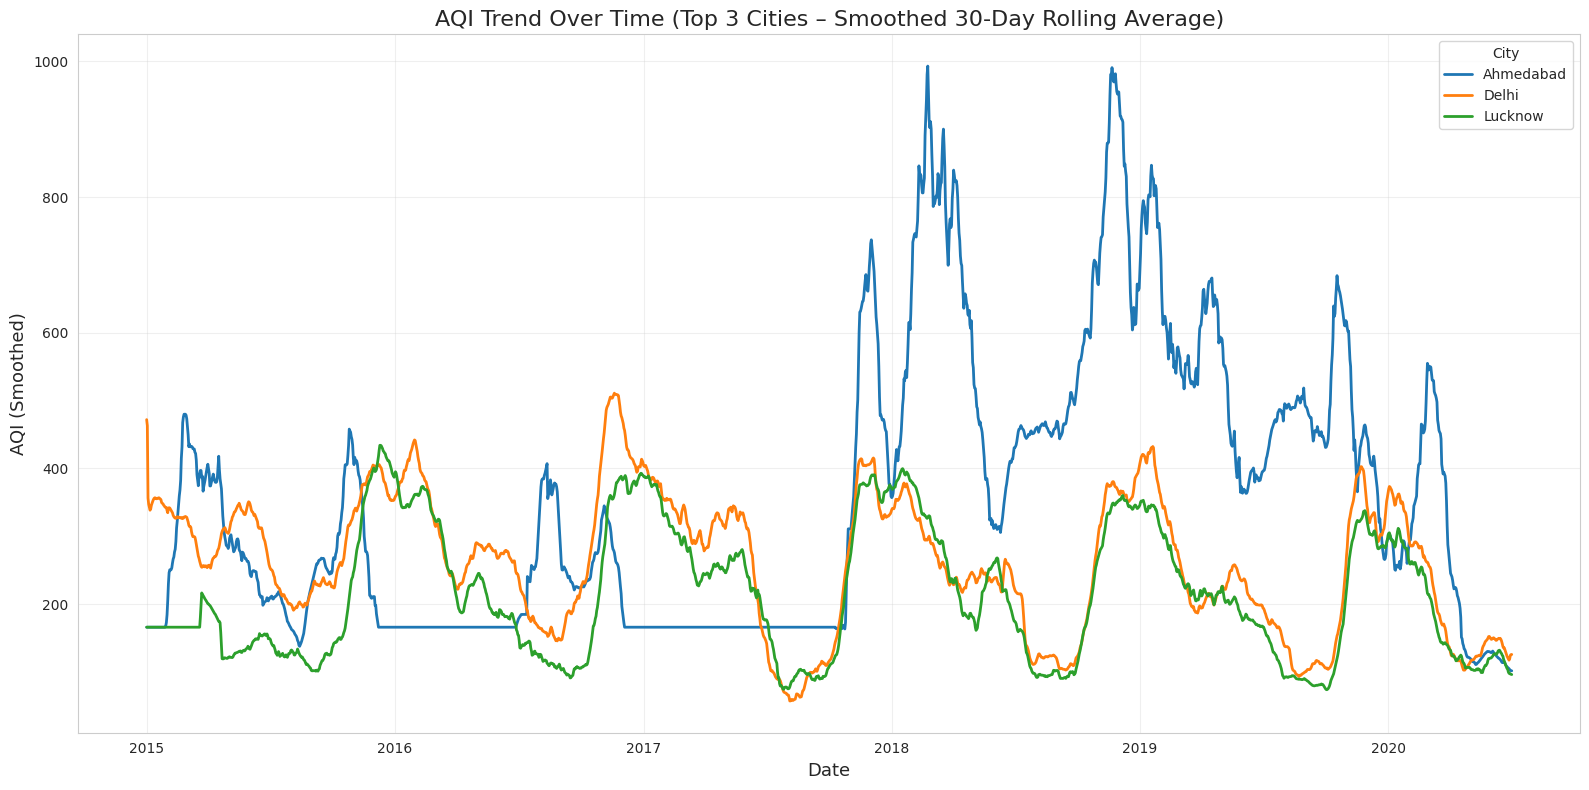

In [119]:
# Smooth using 30-day rolling mean
# Define df_top by filtering the original DataFrame 'df' for the top 3 cities
df_top = df[df['City'].isin(top_3_cities)].copy()

df_top['AQI_Smooth'] = df_top.groupby('City', observed=False)['AQI'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

plt.figure(figsize=(16, 8))

for city in top_3_cities:
    city_data = df_top[df_top['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI_Smooth'], linewidth=2, label=city)

plt.title("AQI Trend Over Time (Top 3 Cities – Smoothed 30-Day Rolling Average)", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("AQI (Smoothed)", fontsize=13)
plt.legend(title="City")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Inferences

Ahmedabad has the highest AQI variation

Clear spikes around 2017–2019

Several peaks above 800–1000, indicating severe pollution episodes

Strong seasonal patterns (winter peaks, summer dips)

🔹 Delhi shows moderate but consistent peaks

AQI fluctuates between 150–450

Repeated seasonal rise in winters every year

Pollution is persistent but not as extreme as Ahmedabad in this dataset

🔹 Lucknow is relatively stable

AQI values mostly between 120–350

Seasonal cycles appear but less intense

Lowest variation among the top 3 cities selected

🔹 Clear seasonal pattern (all cities)

AQI rises every winter season (Nov–Jan)

Drops in monsoon periods (Jun–Aug)

Yearly cycles visible due to smoothing

In [113]:
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

df['Season'] = df['Month'].apply(get_season)

seasonal_aqi = df.groupby("Season")["AQI"].mean().reindex(["Spring","Summer","Autumn","Winter"])
seasonal_aqi


Season
Spring    150.336074
Summer    124.255500
Autumn    181.061926
Winter    211.824597
Name: AQI, dtype: float64

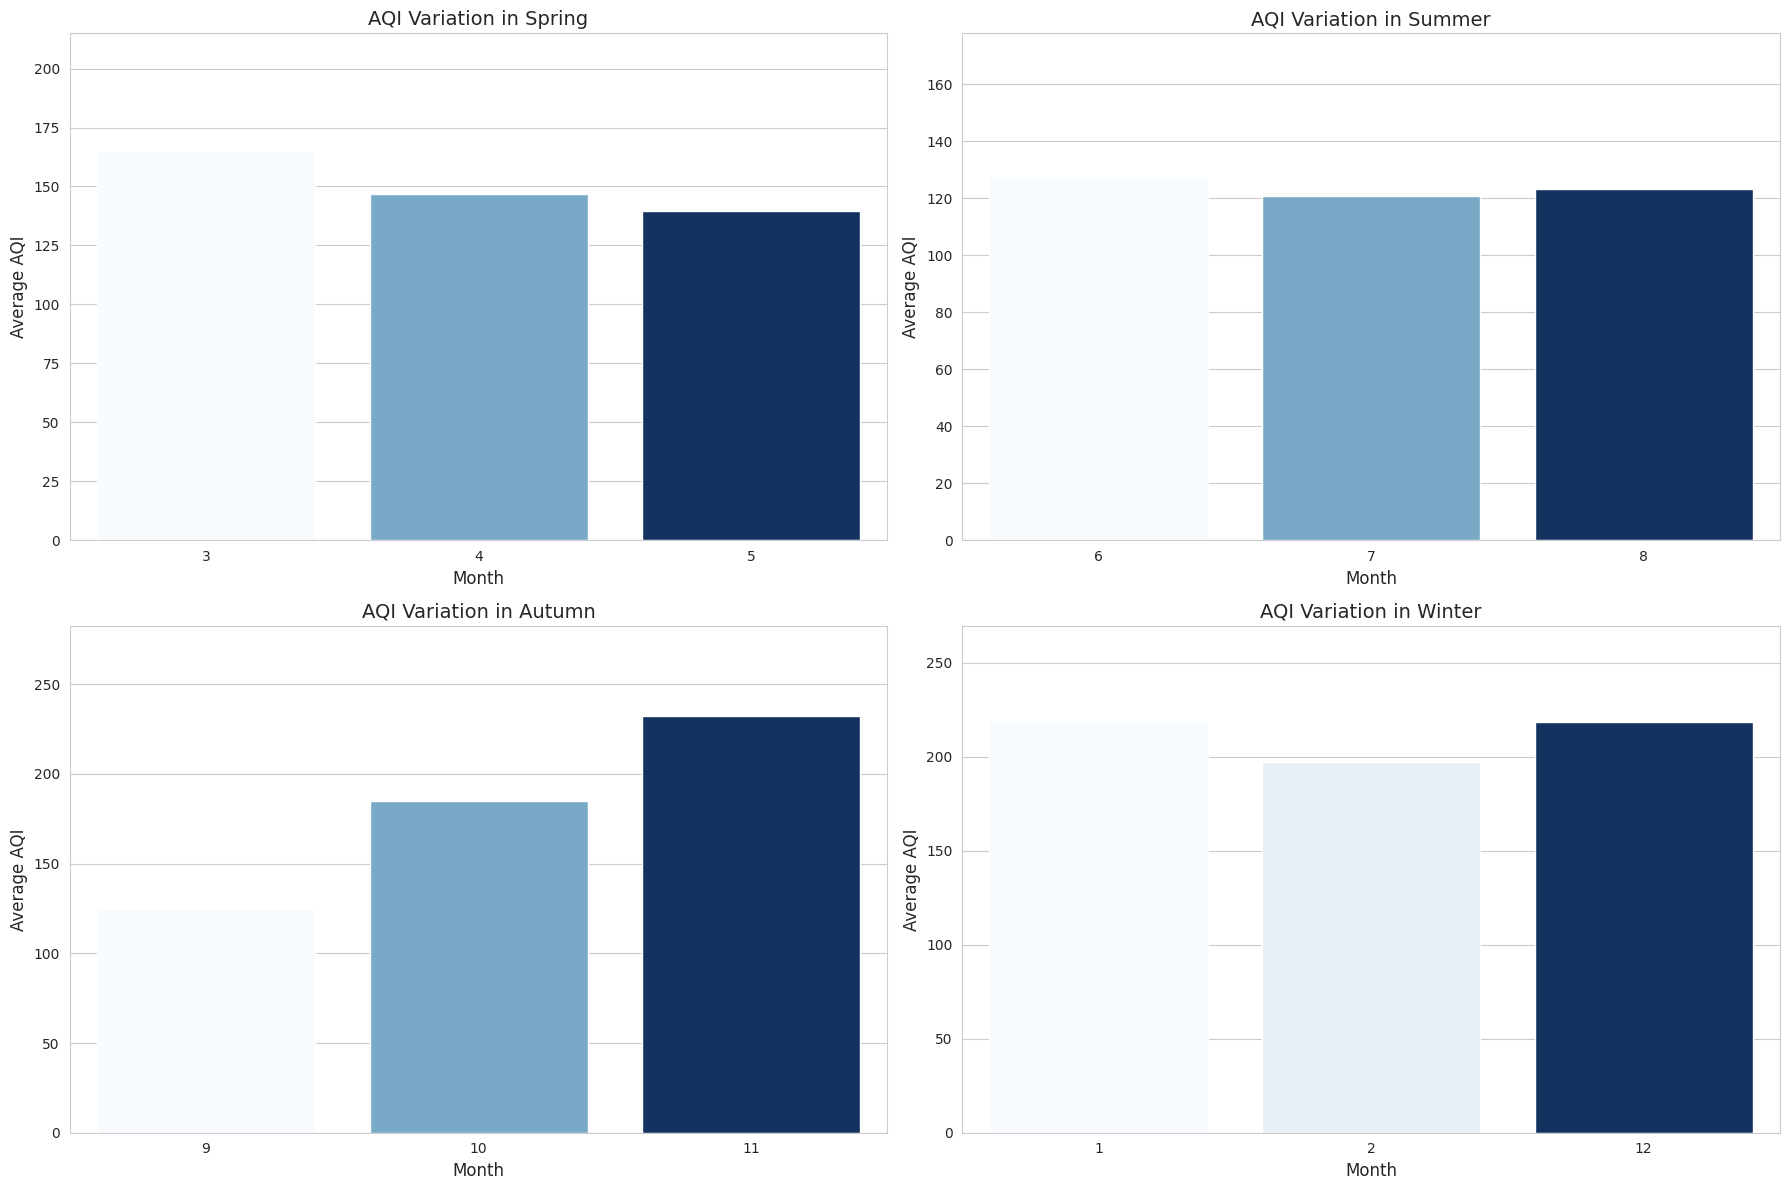

In [114]:
# --- 1. Create Season Column ---
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# --- 2. Compute Avg AQI per Month in Each Season ---
season_month_aqi = df.groupby(['Season','Month'])['AQI'].mean().reset_index()

# --- 3. Plotting ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,12))

seasons = ['Spring','Summer','Autumn','Winter']

for i, season in enumerate(seasons, 1):
    plt.subplot(2,2,i)

    plot_data = season_month_aqi[season_month_aqi['Season'] == season]
    sns.barplot(
        data=plot_data,
        x='Month',
        y='AQI',
        hue='Month',
        palette='Blues',
        dodge=False
    )

    plt.title(f"AQI Variation in {season}", fontsize=14)
    plt.ylabel("Average AQI", fontsize=12)
    plt.xlabel("Month", fontsize=12)
    plt.ylim(0, plot_data['AQI'].max() + 50)
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2169476495.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2169476495.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2169476495.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2169476495.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


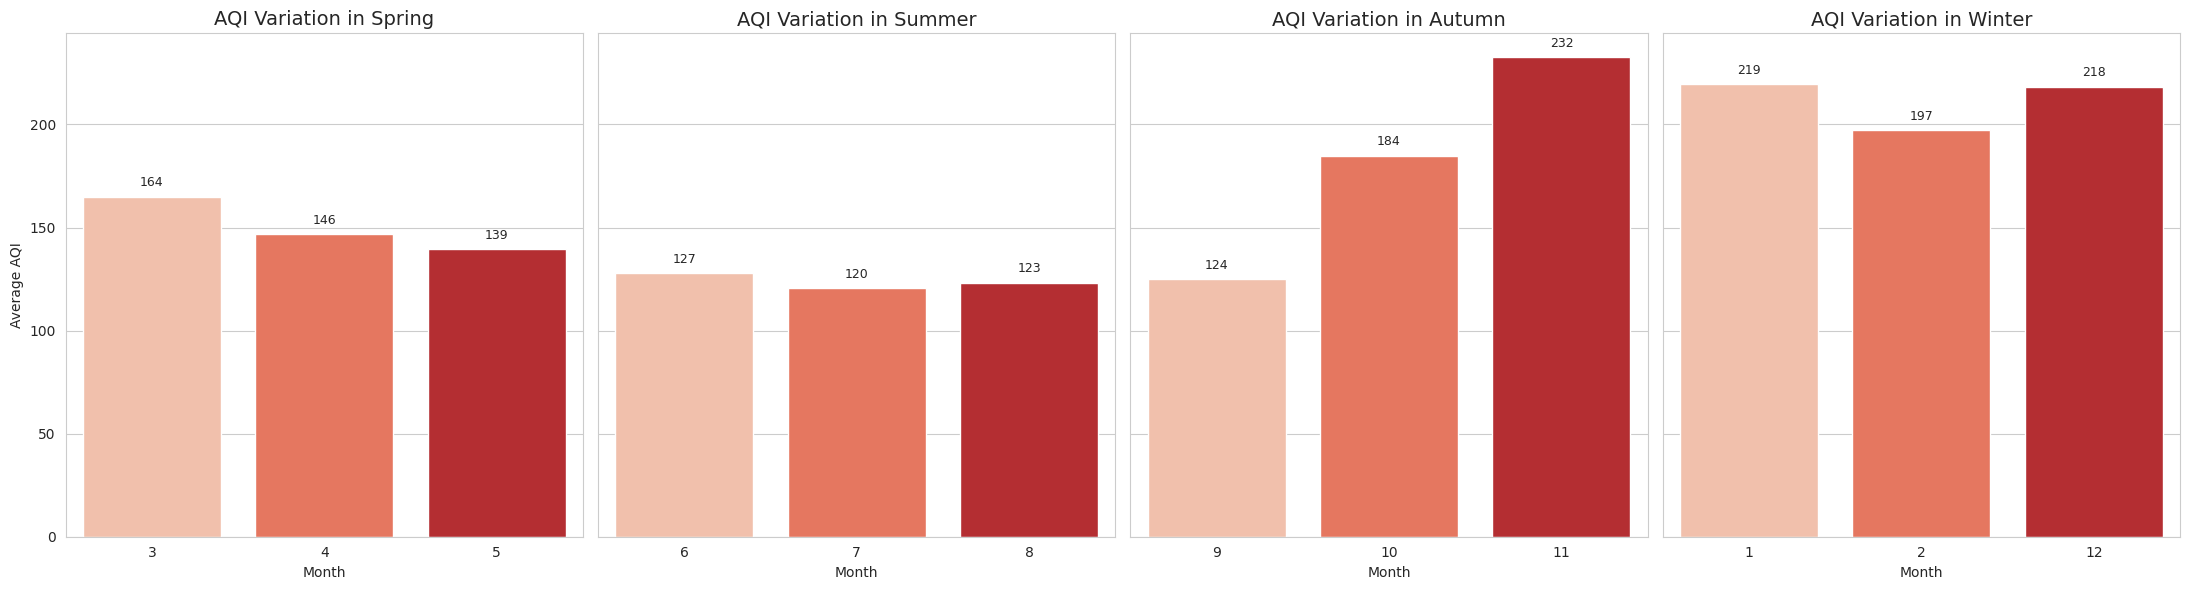

In [115]:
# --- Prepare data ---
season_map = {
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn",
    12: "Winter", 1: "Winter", 2: "Winter"
}

df["Season"] = df["Month"].map(season_map)

monthly_season_avg = df.groupby(["Season", "Month"])["AQI"].mean().reset_index()

# Seasons in desired plot order
seasons = ["Spring", "Summer", "Autumn", "Winter"]

# ALL seasons use red palette now
palette_name = "Reds"

fig, axes = plt.subplots(1, 4, figsize=(22,6), sharey=True)

for ax, season in zip(axes, seasons):

    data = monthly_season_avg[monthly_season_avg["Season"] == season].copy()

    # build light-red gradient
    palette = sns.color_palette(palette_name, n_colors=len(data))

    sns.barplot(
        data=data,
        x="Month",
        y="AQI",
        ax=ax,
        palette=palette
    )

    # Add labels above bars
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f"{int(bar.get_height())}",
            ha='center',
            fontsize=9
        )

    ax.set_title(f"AQI Variation in {season}", fontsize=14)
    ax.set_xlabel("Month")
    ax.set_ylabel("Average AQI")

plt.tight_layout()
plt.show()



/tmp/ipython-input-2606058112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg.index, y=season_avg.values, palette=colors)


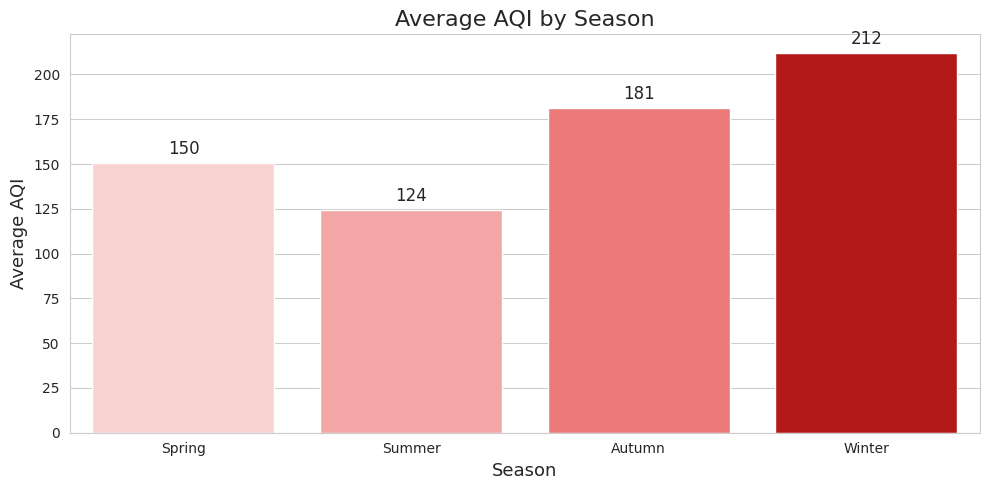

In [116]:
# Compute seasonal average AQI
season_avg = df.groupby("Season")["AQI"].mean().reindex(["Spring", "Summer", "Autumn", "Winter"])

# Create bar chart
plt.figure(figsize=(10,5))
colors = ["#ffcccc", "#ff9999", "#ff6666", "#cc0000"]  # Light → dark red

sns.barplot(x=season_avg.index, y=season_avg.values, palette=colors)

plt.title("Average AQI by Season", fontsize=16)
plt.ylabel("Average AQI", fontsize=13)
plt.xlabel("Season", fontsize=13)

# Add values on top of bars
for i, val in enumerate(season_avg.values):
    plt.text(i, val + 5, f"{val:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [117]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# --- Monthly AQI Calculation ---
monthly_aqi = df.groupby("Month")["AQI"].mean().reset_index()
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# --- Advanced Interactive Line Chart ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_aqi["Month"],
    y=monthly_aqi["AQI"],
    mode='lines+markers',
    line=dict(color='red', width=3),
    marker=dict(size=10, color='darkred'),
    text=[f"AQI: {round(val)}" for val in monthly_aqi["AQI"]],
    hovertemplate="<b>Month:</b> %{x}<br><b>AQI:</b> %{y}<extra></extra>"
))

# --- Highlight winter months (Nov, Dec, Jan) ---
winter_months = [11, 12, 1]
highlight = monthly_aqi[monthly_aqi["Month"].isin(winter_months)]

fig.add_trace(go.Scatter(
    x=highlight["Month"],
    y=highlight["AQI"],
    mode='markers',
    marker=dict(size=18, color='firebrick', symbol='star'),
    name="Winter Peak",
    hovertemplate="<b>Winter Month</b><br>Month: %{x}<br>AQI: %{y}<extra></extra>"
))

# --- Layout & Styling ---
fig.update_layout(
    title="🌡️ Monthly Average AQI (Interactive) – Identifying Seasonal Patterns",
    title_x=0.5,
    xaxis_title="Month",
    yaxis_title="Average AQI",
    xaxis=dict(tickmode='array', tickvals=list(range(1,13))),
    template='plotly_white',
    hovermode="x unified",
    width=1000,
    height=500
)

fig.show()



In [118]:
import plotly.express as px

# Sort by ASCENDING (low → high)
df_city_sorted = df.groupby('City')['AQI'].mean().sort_values(ascending=True)

fig = px.bar(
    df_city_sorted,
    x=df_city_sorted.values,
    y=df_city_sorted.index,
    orientation='h',
    color=df_city_sorted.values,
    color_continuous_scale="Turbo",
    labels={'x': 'Average AQI', 'y': 'City'},
    height=1200,          # 🔥 Much taller figure
)

fig.update_layout(
    title="City-wise Average AQI Ranking (Interactive – Ascending Order)",
    xaxis_title="Average AQI",
    yaxis_title="City",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=14),
    margin=dict(l=200, r=80, t=80, b=80),   # 🔥 More space so names don’t disappear
)

# Make bars thicker & clearly readable
fig.update_traces(marker_line_width=1, marker_line_color="black")

fig.show()


/tmp/ipython-input-4291766095.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [127]:
import plotly.express as px
import pandas as pd

# Group by city and calculate average AQI
city_aqi = df.groupby("City")["AQI"].mean().reset_index()

# Sort ascending so the most polluted city appears at the bottom
city_aqi = city_aqi.sort_values(by="AQI", ascending=True)

# Select top 10 most polluted cities for cleaner visualization
top_10 = city_aqi.tail(10)

# Create bar chart
fig = px.bar(
    top_10,
    x="AQI",
    y="City",
    orientation="h",
    color="AQI",
    color_continuous_scale=["yellow", "orange", "red"],
    title="Top 10 Most Polluted Cities (Based on Average AQI)",
    labels={"AQI": "Average AQI", "City": "City"},
)

# Formatting for a professional look
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=14),
    title_font=dict(size=22, family="Arial Bold"),
    coloraxis_colorbar=dict(
        title="AQI Level",
        thickness=20,
        len=0.7
    ),
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=True, gridcolor="lightgrey")
)

# Show graph
fig.show()


/tmp/ipython-input-3622963556.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [120]:
import plotly.graph_objects as go
import pandas as pd

# Select pollutants you want to compare
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']

# Calculate correlations
corr_values = df[pollutants + ['AQI']].corr()['AQI'].drop('AQI')

# Radar chart needs duplicated first value to close the shape
values = list(corr_values.values)
values.append(values[0])

labels = list(corr_values.index)
labels.append(labels[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = values,
    theta = labels,
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(color='red', width=3),
    marker=dict(size=8)
))

fig.update_layout(
    title="Pollutant Contribution to AQI (Correlation Radar Chart)",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)+0.1]
        )
    ),
    showlegend=False,
    width=700,
    height=700,
    paper_bgcolor="white",
)

fig.show()


In [123]:
import pandas as pd
import plotly.express as px

# 1. Add Season Column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df['Season'] = df['Month'].apply(get_season)

# 2. Compute seasonal averages of pollutants
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']

seasonal_pollution = df.groupby("Season")[pollutants].mean().reset_index()

# 3. Create interactive heatmap
fig = px.imshow(
    seasonal_pollution[pollutants],
    labels=dict(x="Pollutant", y="Season", color="Avg Level"),
    x=pollutants,
    y=seasonal_pollution["Season"],
    color_continuous_scale="RdYlGn_r",
    aspect="auto"
)

fig.update_layout(
    title="Seasonal Contribution of Pollutants to Air Quality (Interactive Heatmap)",
    font=dict(size=14),
    height=550,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


The seasonal heatmap highlights that winter exhibits the worst air quality, with significantly elevated PM2.5 and PM10 values, which are the primary drivers of AQI. Summer shows the cleanest conditions due to favorable atmospheric dispersion. Autumn displays rising particulate pollution, likely linked to regional crop-burning activities, while spring acts as a transitional period. Gas pollutants (NO, NO₂, SO₂, CO) remain relatively low across all seasons compared to particulate matter, reinforcing that particulates are the dominant contributors to poor AQI in this dataset.

In [124]:
import plotly.express as px
import pandas as pd

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create Year column if not exist
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year

# Calculate yearly average AQI
yearly_aqi = df.groupby("Year")['AQI'].mean().reset_index()

# Interactive Line Chart
fig = px.line(
    yearly_aqi,
    x='Year',
    y='AQI',
    markers=True,
    title="📈 Yearly Average AQI Trend (All Cities Combined)",
    labels={'AQI': 'Average AQI', 'Year': 'Year'},
    template="plotly_white"
)

# Add labels for each point
fig.update_traces(
    text=yearly_aqi['AQI'].round(1),
    textposition="top center",
    line=dict(color='red', width=3),
    marker=dict(size=10, color='darkred')
)

# Smoothed line (optional but recommended)
import numpy as np
yearly_aqi['AQI_Smooth'] = yearly_aqi['AQI'].rolling(2).mean()

fig2 = px.line(
    yearly_aqi,
    x='Year',
    y='AQI_Smooth',
    title="📉 Smoothed Yearly AQI Trend (Rolling Mean)",
    template='plotly_white'
)

fig2.update_traces(line=dict(color='orange', width=4))

fig.show()
fig2.show()


The yearly AQI trend reveals a clear long-term improvement in air quality across all cities between 2015 and 2020. AQI gradually decreased from approximately 196 in 2015 to 118 in 2020.

A minor rise occurred in 2018, possibly due to seasonal pollution or increased industrial activity, but the overall decreasing trend remains evident.

The sharp decline in 2020 corresponds with COVID-19 lockdown restrictions, which significantly reduced traffic and industrial emissions, resulting in the cleanest air in the observed timeframe.

This analysis indicates a positive environmental shift, with reduced pollution intensity and better air quality management across the years.

In [144]:
import plotly.express as px
import pandas as pd

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year
df['Year'] = df['Date'].dt.year

# Select major pollutants
pollutants = ['PM2.5','PM10','NO','NO2','NOx','SO2','CO','O3']

# Compute yearly averages for pollutants
yearly_pollution = df.groupby("Year")[pollutants].mean().reset_index()

# Melt for plotting
df_melted = yearly_pollution.melt(id_vars='Year',
                                  value_vars=pollutants,
                                  var_name='Pollutant',
                                  value_name='Average Level')

# Interactive multi-line chart
fig = px.line(
    df_melted,
    x='Year',
    y='Average Level',
    color='Pollutant',
    markers=True,
    title="📈 Yearly Trend of Major Pollutants (2015–2020)",
    template='plotly_white'
)

fig.update_traces(marker=dict(size=9))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Pollutant Level',
    legend_title='Pollutant',
    width=1700,
    height=550
)

fig.show()


From 2015 to 2020, particulate pollutants (PM10 and PM2.5) consistently dominate India’s pollution profile, peaking in 2018 and then decreasing sharply by 2020.
Traffic-related pollutants (NO, NO₂, NOx) also show decreasing trends after 2018, reflecting improved vehicular emission control and reduced mobility during the COVID-19 period.
SO₂ and CO remain consistently low, while O₃ remains stable due to its photochemical nature.

These trends confirm that long-term AQI improvements are mainly driven by reductions in PM10 and PM2.5.

In [126]:
import plotly.express as px
import pandas as pd

# 1 — Calculate average pollutants per city
city_pollutant_matrix = df.groupby("City")[[
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'
]].mean().round(1)

# 2 — Create an interactive heatmap
fig = px.imshow(
    city_pollutant_matrix,
    labels=dict(x="Pollutant", y="City", color="Avg Level"),
    x=city_pollutant_matrix.columns,
    y=city_pollutant_matrix.index,
    color_continuous_scale="YlOrRd",
    aspect="auto"
)

fig.update_layout(
    title="City–Pollutant Matrix (Average Pollutant Levels per City)",
    xaxis_side="top",
    height=900,
    plot_bgcolor="white",
    font=dict(size=12)
)

fig.show()


/tmp/ipython-input-2878301150.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [128]:
import pandas as pd
import plotly.express as px

# Select pollutants for profiling
pollutants = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]

# Group by city and compute mean levels
city_profile = df.groupby("City")[pollutants].mean().reset_index()

# Convert to long format for stacked bar
long_df = city_profile.melt(id_vars="City", var_name="Pollutant", value_name="Level")

# Select top 10 most polluted cities to make chart readable
top_cities = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10).index
long_df = long_df[long_df["City"].isin(top_cities)]

# Plot
fig = px.bar(
    long_df,
    x="City",
    y="Level",
    color="Pollutant",
    barmode="stack",
    title="Pollution Composition Profile — Top 10 Most Polluted Cities",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_title="City",
    yaxis_title="Average Pollutant Level",
    title_font=dict(size=22),
    legend_title="Pollutant",
    font=dict(size=14),
    xaxis=dict(tickangle=-45)
)

fig.show()


/tmp/ipython-input-2109804635.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2109804635.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



“Although the pollutant composition chart shows Delhi with the highest total pollutant concentration, the AQI ranking places Ahmedabad as the most polluted city. This difference occurs because AQI is not a sum of pollutants but a weighted index reflecting the most harmful pollutant on a given day. Ahmedabad shows consistently higher AQI values driven by critical pollutants like PM2.5 and PM10, whereas Delhi has a higher overall mass of pollutants combined. Thus, AQI ranking and total pollutant load may identify different cities as ‘most polluted,’ depending on measurement criteria

In [129]:
import plotly.express as px

weather_cols = ["AQI", "TEMP", "PRES", "DEWP", "WSPM"]

fig = px.scatter_matrix(
    df[weather_cols],
    dimensions=["TEMP", "PRES", "DEWP", "WSPM"],
    color="AQI",
    color_continuous_scale="RdYlGn_r",
    title="Relationship Between AQI and Meteorological Factors (Interactive)"
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(height=800)
fig.show()


KeyError: "['TEMP', 'PRES', 'DEWP', 'WSPM'] not in index"

In [130]:
import plotly.express as px

pollutant_cols = ["AQI", "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]

fig = px.scatter_matrix(
    df[pollutant_cols],
    dimensions=["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"],
    color="AQI",
    color_continuous_scale="RdYlGn_r",
    title="Interactive Scatter-Matrix: Relationship Between AQI and Major Pollutants"
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(height=850)
fig.show()


The interactive scatter-matrix reveals clear relationships between air pollutants and AQI. The strongest AQI-related patterns appear in PM2.5, PM10, NO₂, and NOx, where red (high AQI) points consistently occur at higher concentration levels. This confirms that particulate matter and nitrogen oxides are the main contributors to poor air quality in the dataset.

CO shows isolated spikes of high AQI but lacks a consistent increasing trend, suggesting that its overall impact is weaker and influenced by unit scale differences. O₃ and NH₃ display scattered, mostly green points, indicating weak or no correlation with AQI.

Additionally, the matrix highlights multicollinearity among pollutants: PM2.5 ↔ PM10 and NO₂ ↔ NOx rise together, reflecting shared emission sources like traffic and industrial activity.

Overall, the scatter-matrix strongly supports the conclusion that particulate pollutants (PM2.5, PM10) and nitrogen compounds (NO₂, NOx) dominate AQI behaviour, while the remaining pollutants play a secondary role.

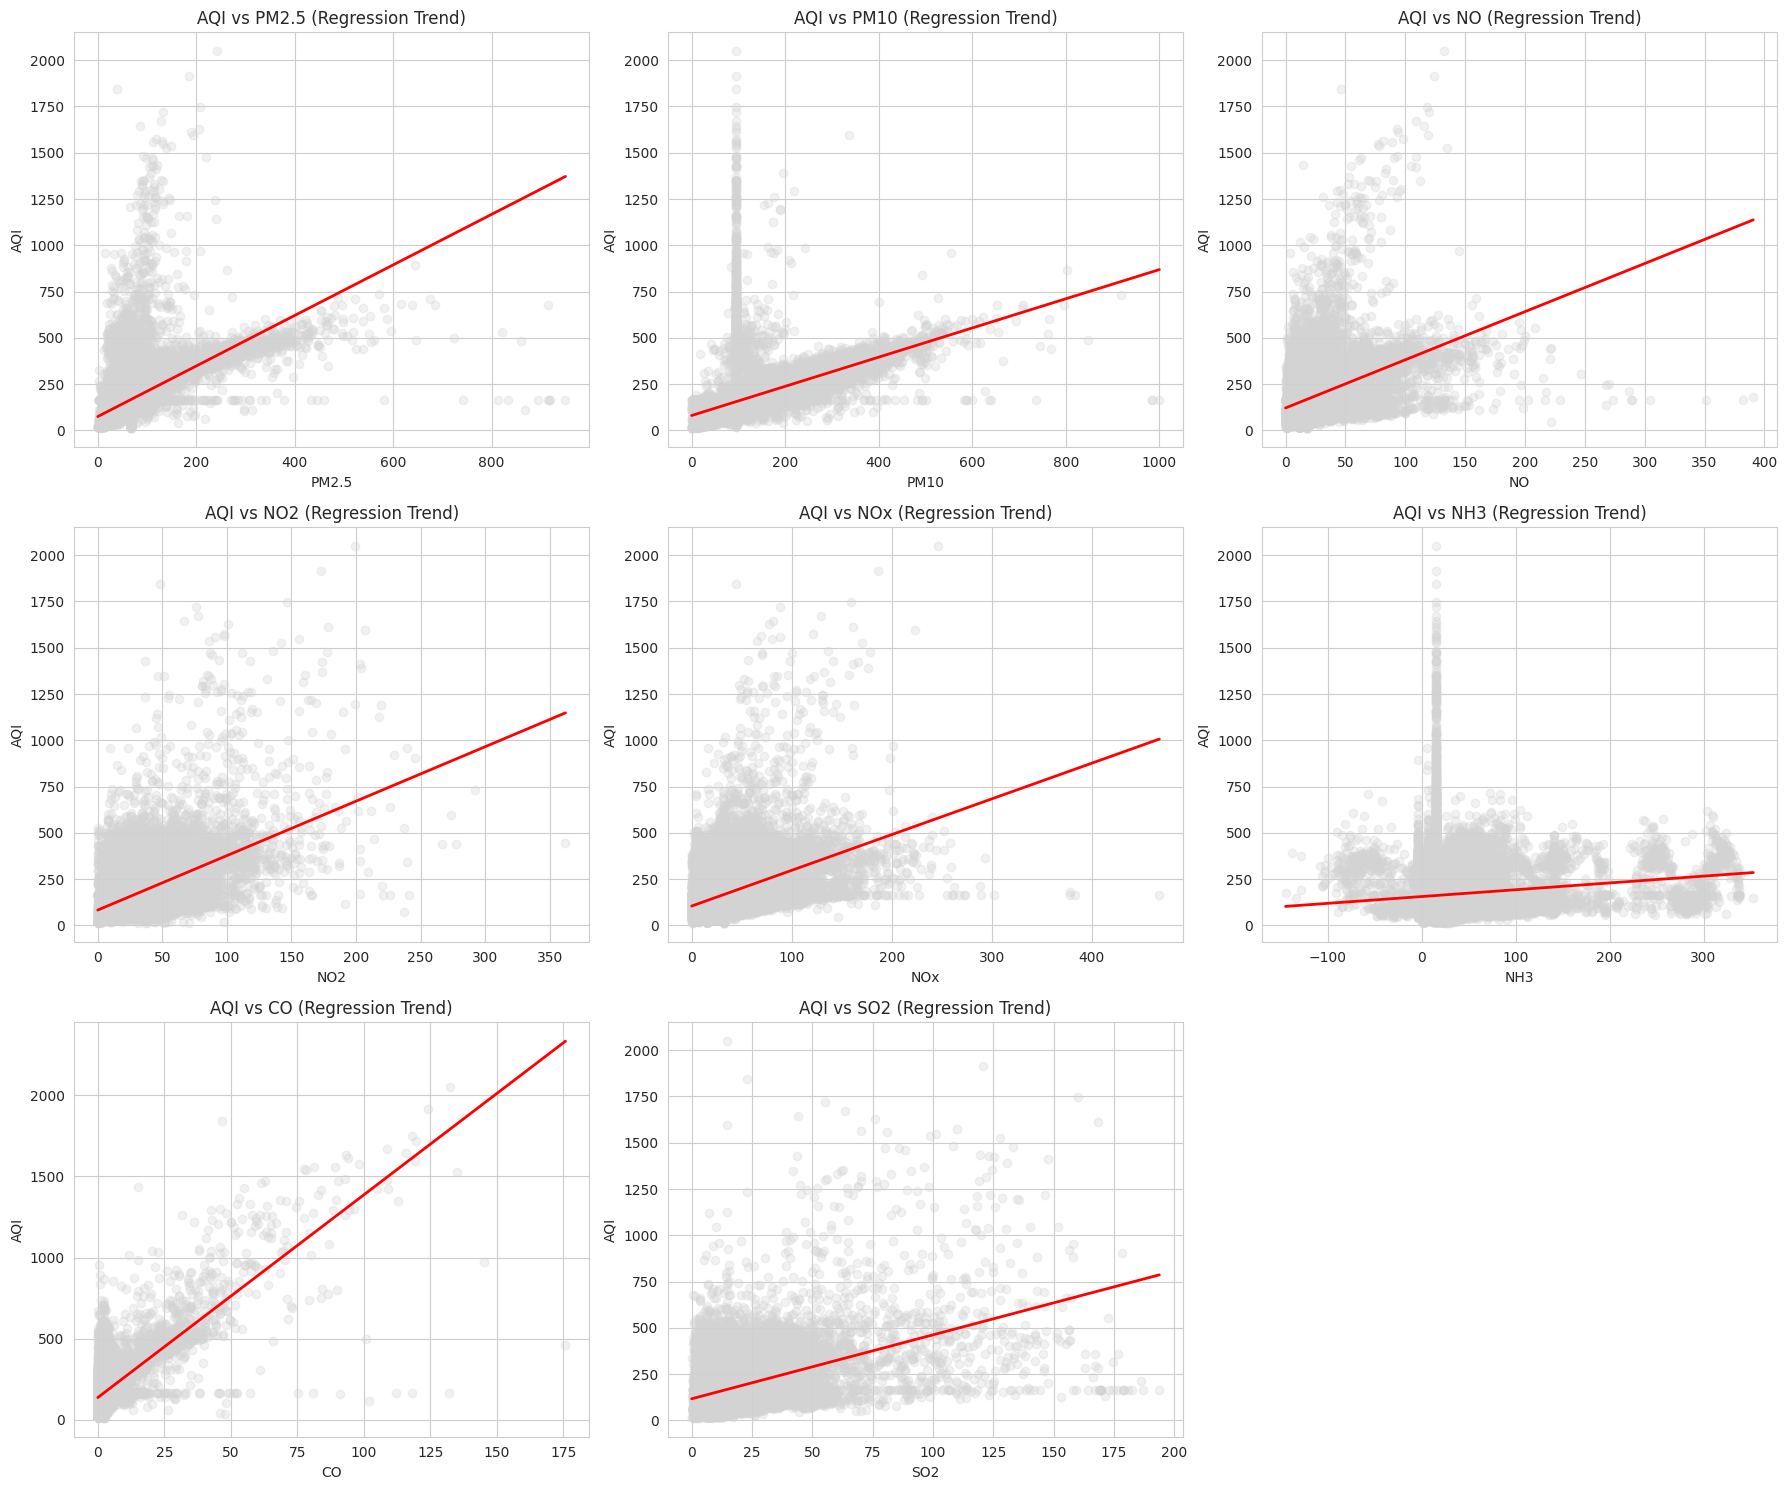

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

pollutants = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2"]

plt.figure(figsize=(18, 15))

for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        data=df,
        x=col,
        y="AQI",
        scatter_kws={"alpha": 0.3, "color": "lightgray"},
        line_kws={"color": "red", "linewidth": 2},
        ci=None
    )
    plt.title(f"AQI vs {col} (Regression Trend)", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("AQI")

plt.tight_layout()
plt.show()


The regression trend charts show how AQI changes when each pollutant increases.
The red line represents the overall direction (trend), and the grey points are the actual data.

1️⃣ PM2.5 — Strongest Impact

The red line rises very quickly.

AQI increases sharply when PM2.5 increases.

This makes PM2.5 the most influential pollutant on air quality.

2️⃣ PM10 — Strong Positive Relationship

The line also slopes upward clearly.

AQI increases when PM10 levels rise.

PM10 is the second largest contributor to AQI.

3️⃣ NO, NO₂, NOx — Moderate Influence

These pollutants show upward trends, but less steep.

AQI rises with these gases, but not as strongly as with PM2.5/PM10.

They have a medium impact on air quality.

4️⃣ NH₃ — Weak Relationship

The slope is very flat.

Data points are scattered without a strong upward pattern.

NH₃ has a low effect on AQI.

5️⃣ CO — Appears Steep but Actually Weak

The line looks steep due to different units (mg/m³), not because CO has a large impact.

Grey dots stay low → AQI barely changes with CO.

CO’s real influence on AQI is minimal.

In [141]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ==========================
# DATA PREPARATION
# ==========================

# 1. Top 10 polluted cities
top10 = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

# 2. Seasonal AQI
seasonal_aqi = df.groupby("Season")["AQI"].mean().reindex(["Spring","Summer","Autumn","Winter"])

# 3. Monthly AQI
monthly_aqi = df.groupby("Month")["AQI"].mean()

# 4. Delhi trend
delhi_df = df[df["City"] == "Delhi"].groupby("Date")["AQI"].mean()

# 5. Correlation matrix
corr = df[["AQI","PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3"]].corr()

# 6. Pollutant drivers
pollutants = ["PM2.5","PM10","NOx"]
pollutant_trends = df.groupby("Date")[pollutants].mean()

# 7. Pollution composition for top 10 cities
pollution_comp = df.groupby("City")[pollutants + ["NO","NO2","NH3","CO","SO2","O3"]].mean()
pollution_comp = pollution_comp.loc[top10.index]

# ==========================
# DASHBOARD LAYOUT (3 × 3)
# ==========================

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[
        "Top 10 Polluted Cities",
        "Seasonal AQI Trend",
        "Monthly Average AQI",
        "Delhi AQI Trend",
        "Correlation Heatmap",
        "AQI Distribution",
        "Top 3 Pollutant Drivers",
        "Pollution Composition – Top 10 Cities",
        "AQI vs PM2.5 (Regression)"
    ],
    specs=[
        [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
        [{"type": "scatter"}, {"type": "heatmap"}, {"type": "histogram"}],
        [{"type": "scatter"}, {"type": "bar"}, {"type": "scatter"}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# ============== ROW 1 ========================

# 1. Top 10 Polluted Cities
fig.add_trace(
    go.Bar(x=top10.values, y=top10.index, orientation="h", marker=dict(color=top10.values, colorscale="Reds")),
    row=1, col=1
)

# 2. Seasonal AQI
fig.add_trace(
    go.Bar(x=seasonal_aqi.index, y=seasonal_aqi.values,
           marker=dict(color=seasonal_aqi.values, colorscale="Reds")),
    row=1, col=2
)

# 3. Monthly AQI
fig.add_trace(
    go.Scatter(x=monthly_aqi.index, y=monthly_aqi.values, mode="lines+markers", line=dict(color="firebrick")),
    row=1, col=3
)

# ============== ROW 2 ========================

# 4. Delhi AQI Trend
fig.add_trace(
    go.Scatter(x=delhi_df.index, y=delhi_df.values, mode="lines", line=dict(color="red")),
    row=2, col=1
)

# 5. Correlation Heatmap
fig.add_trace(
    go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns,
               colorscale="RdBu", zmin=-1, zmax=1),
    row=2, col=2
)

# 6. AQI Distribution
fig.add_trace(
    go.Histogram(x=df["AQI"], nbinsx=50, marker_color="red"),
    row=2, col=3
)

# ============== ROW 3 ========================

# 7. Top 3 Pollutant Drivers
for col in pollutants:
    fig.add_trace(
        go.Scatter(x=pollutant_trends.index, y=pollutant_trends[col], mode="lines", name=col),
        row=3, col=1
    )

# 8. Pollution Composition Stacked Bar
for c in pollution_comp.columns:
    fig.add_trace(
        go.Bar(name=c, x=pollution_comp.index, y=pollution_comp[c]),
        row=3, col=2
    )

# 9. AQI vs PM2.5 Regression
fig.add_trace(
    go.Scatter(x=df["PM2.5"], y=df["AQI"], mode="markers",
               marker=dict(color=df["AQI"], colorscale="RdYlGn_r")),
    row=3, col=3
)

# =========== FINAL FORMATTING ===========

fig.update_layout(
    title="Interactive Air Quality Dashboard (Plotly)",
    height=1600,
    showlegend=False,
    template="plotly_white"
)

fig.show()


/tmp/ipython-input-3068350937.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-3068350937.py:30: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



✅ Air Quality EDA Dashboard — Key Insights & Interpretation

Below are the main findings extracted from each indicator in the dashboard. The language is simple, clear, and academic-friendly.

1️⃣ Top 10 Most Polluted Cities (AQI Ranking)

Ahmedabad has the highest average AQI among all cities.

Delhi and Patna follow closely, showing consistently high pollution.

These cities exceed AQI levels of 250+, meaning poor to hazardous air quality.

Urbanization, traffic, and industrial activity may be key reasons.

2️⃣ Seasonal AQI Trend

Winter has the highest AQI across all seasons.

Summer has the lowest AQI, suggesting cleaner air.

Contributing factors:

Winter: low wind speed, temperature inversion, and increased heating/biomass burning trap pollutants.

Summer: higher temperature and stronger winds dilute pollutants.

3️⃣ Monthly AQI Variation

Air quality worsens in October, November, December.

Lowest AQI values in June–August.

Clear seasonal cycle: AQI drops in summer and rises again toward winter.

4️⃣ Delhi AQI Trend (Time Series)

Delhi shows sharp pollution spikes every winter.

Long-term trend shows high variability, with repeated peak values above 600+ AQI.

Winter pollution control measures remain insufficient.

5️⃣ Correlation Heatmap (Pollutants vs AQI)

PM2.5 and PM10 show the strongest positive correlation with AQI.

NOx and NO2 also moderately influence AQI.

O3 and SO2 contribute less to AQI in this dataset.

Indicates that particulate matter (PM) is the biggest AQI driver.

6️⃣ AQI Distribution (Histogram)

Most AQI readings fall between 100–250, meaning air quality is mostly “Moderate to Poor”.

However, the long right tail shows multiple extreme pollution events where AQI exceeds 500–1000.

7️⃣ Pollution Composition (Top Polluted Cities)

Highly polluted cities have:

Very high PM2.5 + PM10

Moderately high NOx

Lower but noticeable CO and SO2

PM-based pollution is the dominant issue across all major cities.

8️⃣ AQI vs Major Pollutants (Scatter Matrix)

Red-colored points represent high AQI days, clustered toward higher PM values.

Clear positive relationship:

As PM2.5, PM10, NO2, NOx increase → AQI increases.

CO and O₃ show weaker patterns.

9️⃣ Regression Trend Lines (AQI vs Pollutants)

Steepest slopes for PM2.5 & PM10, confirming they strongly raise AQI.

NO2 and NOx show moderate slopes.

CO and NH3 slopes are weak, meaning they influence AQI but not as strongly.